In [1]:

import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D
import sys
from sklearn.preprocessing import StandardScaler
from sdv.demo import load_tabular_demo
from sdv.tabular import CTGAN
from sdv.evaluation import evaluate
np.set_printoptions(threshold=sys.maxsize)

In [2]:
pwd

'c:\\Users\\ALIENWARE\\Desktop\\xiaoyi\\musa650-final-main\\musa650-final-main\\script'

In [3]:
data=pd.read_csv('..\\rawdata\\landslide2.csv')
data.head()

,OBJECTID,SLIDE_TYPE,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS
0,1,R,44.0,C,1964,136.0,127.0,9.0,N,A2
1,2,R,29.0,C,1964,122.0,113.0,9.0,N,C1
2,3,R,22.0,C,1964,48.0,39.0,9.0,N,A2
3,4,R,22.0,C,1964,53.0,42.0,11.0,N,C1
4,5,R,43.0,C,1964,97.0,87.0,10.0,N,B1


#### data process


C:\Users\ALIENW~1\AppData\Local\Temp/ipykernel_10272/2648171849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['history']=2022-data1['YEAR_1']
C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

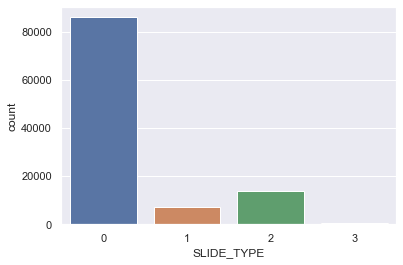

In [46]:
data1=data[~data['SLOPE'].isin([9999])]
data1=data[~data['HEADELEV'].isin([9999])]
data1=data[~data['TAILELEV'].isin([9999])]
data1['history']=2022-data1['YEAR_1']
data1=data1.drop(['OBJECTID','YEAR_1'], axis=1)
data2 = pd.get_dummies(data1, columns=['COVER','GULLY','CLASS'])
#Y variable: SLIDE_TYPE
def slide_type(slide_type1):
    if slide_type1 == 'R':
        return 0
    elif slide_type1 == 'C':
        return 1
    elif slide_type1 == 'O':
        return 2
    else :
        return 3
    
data2['SLIDE_TYPE'] = data2['SLIDE_TYPE'].apply(slide_type)

sns.countplot(data2['SLIDE_TYPE'] )

In [47]:
data2.head()

,SLIDE_TYPE,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y,CLASS_-,CLASS_A1,CLASS_A2,CLASS_B1,CLASS_B2,CLASS_C1,CLASS_C2,CLASS_S
0,0,44.0,136.0,127.0,9.0,58,0,0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,29.0,122.0,113.0,9.0,58,0,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0,22.0,48.0,39.0,9.0,58,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,22.0,53.0,42.0,11.0,58,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,43.0,97.0,87.0,10.0,58,0,0,1,0,1,0,0,0,0,1,0,0,0,0


In [48]:
col= data2.columns[pd.np.r_[1:20]]
x = np.array(data2[col])
y=np.array(data2['SLIDE_TYPE'])
# collect data with train data:test data is 3:7
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, stratify = y, random_state = 4)


C:\Users\ALIENW~1\AppData\Local\Temp/ipykernel_10272/2706905001.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  col= data2.columns[pd.np.r_[1:20]]


In [49]:
y.shape

(107166,)

In [50]:
X_train[:,:1]

array([[2.95000000e+01],
       [4.70000000e+01],
       [2.55000000e+01],
       [2.55000000e+01],
       [4.65000000e+01],
       [4.05000000e+01],
       [3.60000000e+01],
       [3.25000000e+01],
       [5.00000000e+01],
       [3.10000000e+01],
       [4.95000000e+01],
       [2.35000000e+01],
       [3.30000000e+01],
       [3.85000000e+01],
       [3.30000000e+01],
       [3.15000000e+01],
       [3.90000000e+01],
       [3.30000000e+01],
       [4.25000000e+01],
       [2.95000000e+01],
       [1.15000000e+01],
       [3.85000000e+01],
       [4.65000000e+01],
       [4.70000000e+01],
       [4.50000000e+01],
       [4.15000000e+01],
       [3.60000000e+01],
       [3.90000000e+01],
       [5.45000000e+01],
       [2.45000000e+01],
       [2.40000000e+01],
       [4.10000000e+01],
       [3.85000000e+01],
       [3.70000000e+01],
       [4.05000000e+01],
       [3.30000000e+01],
       [4.20000000e+01],
       [1.25000000e+01],
       [3.50000000e+01],
       [3.10000000e+01],


In [51]:
y_train

array([0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [52]:
# the input of gan in svd package is df, here convert the numpy into df
original_train=np.concatenate((y_train.reshape(-1,1),X_train),axis=1)
train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:20]])
train_data.head()


C:\Users\ALIENW~1\AppData\Local\Temp/ipykernel_10272/3486104946.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  train_data=pd.DataFrame(data=original_train,columns=data2.columns[pd.np.r_[:20]])


,SLIDE_TYPE,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y,CLASS_-,CLASS_A1,CLASS_A2,CLASS_B1,CLASS_B2,CLASS_C1,CLASS_C2,CLASS_S
0,0.0,29.5,332.0,319.0,13.0,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,47.0,96.0,84.0,12.0,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,25.5,163.0,158.0,5.0,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,25.5,211.0,206.0,5.0,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,46.5,172.0,159.0,13.0,43.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# todo: if you have GPU, cuda = True, else cuda = False 
model = CTGAN(cuda=True)
# todo(important!): here we train gan model according to original train_data
# tune the parameter according to ref doc:https://sdv.dev/SDV/user_guides/single_table/ctgan.html
model.fit(train_data)

C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase 

In [12]:
original_train.shape

(75016, 20)

In [13]:

# todo: nothing needs to change but a reminder: 
# once you decide to use previous model, just load it, you don't need to train it again!

# save gan model 
model.save('my_model.pkl')
# load gan model 
loaded = CTGAN.load('my_model.pkl')
# generate new data, the original data: new data = 1:1 
# todo: you can change the ratio between original data: new data by 'num_rows'
new_data = loaded.sample(num_rows=train_data.shape[0])


In [43]:
new_data.shape

(75016, 20)

C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SLIDE_TYPE', ylabel='count'>

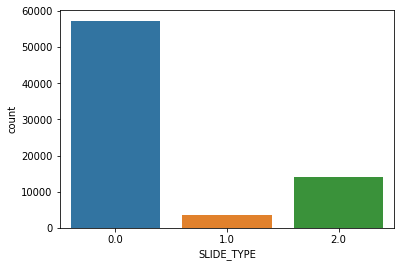

In [14]:
# label ditribution in sythetic data
# todo(important!): nothing need to change, but remember to tune the parameter according to the this plot
sns.countplot(new_data['SLIDE_TYPE'] )


In [16]:
# todo(important!): understand the evaluation metric and add it to report 
# and use other metrics with doc below to evaluate and figure out what is wrong with new data
# ref doc: https://sdv.dev/SDV/user_guides/evaluation/index.html#evaluation
evaluate(new_data, train_data)

C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

0.645982515446226

In [17]:
# new train data: the mixture of original and generative data
new_train_data=pd.concat(
    [new_data, train_data],
    axis=0,
)
print(new_train_data.shape)
new_train_data.head()

(150032, 20)


,SLIDE_TYPE,SLOPE,HEADELEV,TAILELEV,ELE_DIFF,history,COVER_A,COVER_B,COVER_C,COVER_D,GULLY_N,GULLY_Y,CLASS_-,CLASS_A1,CLASS_A2,CLASS_B1,CLASS_B2,CLASS_C1,CLASS_C2,CLASS_S
0,0.0,32.233240,14.271770,15.155954,5.605017,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,41.651293,13.129789,5.032960,7.095882,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,36.485063,392.612589,294.984443,27.626380,59.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.0,32.598117,224.275320,253.710054,9.513927,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,32.314929,213.789237,194.072737,1.827560,59.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# todo: nothing needs to change, but you can read the data directly next time
new_train_data.to_csv('../save_data/new_train_data.csv')

In [24]:
# convert df to numpy for training input 
# todo(important!): shuffle the data, ref doc: https://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html
new_train_X=new_train_data.iloc[:,1:].values
new_train_Y_1=new_train_data.iloc[:,0:1].values
new_train_Y=np.squeeze(new_train_Y_1)

In [25]:
# todo: the current training data: test data = 7: 1.5, you can adjust the training dataset size by using resample
# ref doc: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html
print(new_train_X.shape)
print(X_test.shape)
print(new_train_Y.shape)
print(y_test.shape)

(150032, 19)
(32150, 19)
(150032,)
(32150,)


In [26]:
# We need to do feature scaling first.
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#sc = MinMaxScaler()
new_train = sc.fit_transform(new_train_X)
X_test = sc.fit_transform(X_test)

### 1. KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# todo: n_jobs=-1, accelerate running speed: https://scikit-learn.org/stable/computing/parallelism.html
model = KNeighborsClassifier(n_jobs=-1)

param_grid = { 
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1)

grid.fit(new_train_X, new_train_Y.ravel())

metric = grid.best_estimator_.metric
n_neighbors = grid.best_estimator_.n_neighbors
weights = grid.best_estimator_.weights

# summarize the results of the grid search
print('Best score:', grid.best_score_)
print('Best hyperparameters:',grid.best_params_)

C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.90594681 0.90829963 0.90939274 0.90846631 0.90972603
 0.90693997 0.90831968 0.91116568 0.91211881 0.91300528 0.91467826
 0.91268538 0.91459164 0.91129236 0.91341191]
  warnings.warn(


Best score: 0.9146782631787481
Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [37]:
knn = KNeighborsClassifier(metric=metric, n_neighbors=n_neighbors, weights=weights, n_jobs=8).fit(new_train_X, new_train_Y.ravel())
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

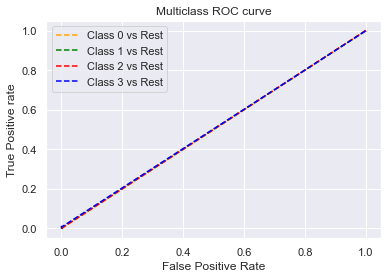

In [38]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, knn_proba[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='red', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='blue', label='Class 3 vs Rest')

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300);

In [39]:
knn_cls_precision, knn_cls_recall, knn_cls_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average=None, labels=[0,1,2,3])

C:\Users\ALIENWARE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
knn_conf_mat = confusion_matrix(y_test, knn_pred)
knn_acc = accuracy_score(y_test, knn_pred)
print('k Nearest Neighbors:')
print('Accuracy:',knn_acc)
#print('ROC AUC=%.4f' % (knn_roc_auc))

k Nearest Neighbors:
Accuracy: 0.12818040435458786


Confusion Matrix:


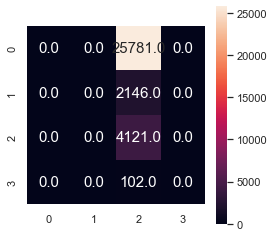

In [41]:
array = confusion_matrix(y_test, knn_pred)

knn_cm = pd.DataFrame(array, range(4), range(4))

plt.figure(figsize=(4,4))
sns.set(font_scale=1) # for label size
sns.heatmap(knn_cm, annot=True, annot_kws={"size": 15}, cbar=True, square= True, fmt='.1f') # font size

print('Confusion Matrix:')
plt.show()

In [42]:
for i in range(n_class): 
    print(i)
    print('Precision  = %.4f ' % (knn_cls_precision[i]))
    print('Recall on Y label = %.4f ' % (knn_cls_recall[i]))
    print('F1 on Y label = %.4f ' % (knn_cls_f1[i]))
    print('----------------------------')

0
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
1
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
2
Precision  = 0.1282 
Recall on Y label = 1.0000 
F1 on Y label = 0.2272 
----------------------------
3
Precision  = 0.0000 
Recall on Y label = 0.0000 
F1 on Y label = 0.0000 
----------------------------
